# Task 1

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import math
import utils

## Our Implementation

In [87]:
dataset = pd.read_csv("Task1Dataset\\list.txt") # import data

our_total_error = 0 # error counter
hough_lines = 0 # inistaite hough_lines
thresh = 0 # hough threshold
counter = 0 # initiate conuter for dynamic param assignment
best_hough = None # keep track of best hough model, initiate to None

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)
    
    #Canny Step 
    edges = utils.canny(img, gauss_kernel_size=5, sigma=35, low_threshold=50, high_threshold=150)

    #Hough Step
    hough_lines = utils.hough_lines(edges, threshold = 90, theta_res= 1.668, rho_res=1)
    best_hough = hough_lines
    
    # Dynamic hyperparameter aassignment
    while len(hough_lines) < 4 or len(hough_lines) > 6:
        if counter == 100: break 
        counter += 1
        if len(hough_lines) > 6: 
            thresh += 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines
        
        else:
            thresh -= 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines

    
    #print(len(hough_lines))
    counter = 0
    line_angles = []
    for rho, theta in best_hough:
        # Handle whether the line is in the positive or negative x
        #theta += np.pi
        if (rho < 0):
            #print("error:", filename)
            theta += np.pi

        theta = theta % (2*np.pi)
        line_angles.append(theta)

    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")


    # Calculate difference of angles and choose the smaller angle
    print(f"max line {np.rad2deg(max(line_angles))} | min line {np.rad2deg(min(line_angles))}")
    
    angle1 = abs(max(line_angles)) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    print("angle1: " , np.rad2deg(angle1) , "angle2: ", np.rad2deg(angle2))
    
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    print(f"Our Prediction: {angle_between_lines} -- Correct_answer: {correct_answer} -- Errors: {np.abs(correct_answer-angle_between_lines)}")
    our_total_error += np.abs(correct_answer-angle_between_lines)
    print("\n")

print(f"Our Total Error: {our_total_error}")


max line 55.12400000000059 | min line 15.09200000000044
angle1:  40.03200000000015 angle2:  319.96799999999985
Our Prediction: 40.0 -- Correct_answer: 40 -- Errors: 0.0


max line 30.104000000000497 | min line 10.08800000000042
angle1:  20.016000000000076 angle2:  339.9839999999999
Our Prediction: 20.0 -- Correct_answer: 20 -- Errors: 0.0


max line 60.12800000000062 | min line 0.08000000000038199
angle1:  60.048000000000236 angle2:  299.95199999999977
Our Prediction: 60.0 -- Correct_answer: 60 -- Errors: 0.0


max line 330.05600000000027 | min line 90.00800000000002
angle1:  240.04800000000026 angle2:  119.95199999999973
Our Prediction: 120.0 -- Correct_answer: 120 -- Errors: 0.0


max line 330.05600000000027 | min line 23.43200000000047
angle1:  306.6239999999998 angle2:  53.376000000000204
Our Prediction: 53.0 -- Correct_answer: 53 -- Errors: 0.0


max line 71.80400000000067 | min line 0.08000000000038199
angle1:  71.72400000000029 angle2:  288.2759999999997
Our Prediction: 72.0 -- 

## Comparison

In [32]:
def our_implementation(img: np.ndarray):
    # Canny Step
    edges = utils.canny(img, gauss_kernel_size=5, sigma=35, low_threshold=50, high_threshold=150)

    # Hough Step
    hough_lines = utils.hough_lines(edges, theta_res= 1.668, threshold=90, rho_res=1)
    best_hough = hough_lines
    
    #Set counter and thresh vars to 0
    counter = 0
    thresh = 0 
    
    # Dynamic Hyperparameter assignment
    while len(hough_lines) < 4 or len(hough_lines) > 6:
        if counter == 100: break 
        counter += 1
        if len(hough_lines) > 6: 
            thresh += 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines
        
        else:
            thresh -= 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines

    
    line_angles = []
    for rho, theta in best_hough:
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi

        line_angles.append(theta)


    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")
        #continue

    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    return angle_between_lines

    

In [15]:
def opencv_implementation(img: np.ndarray):
    # Gaussian blur. Not in cv2.Canny
    img = cv2.GaussianBlur(img, (5,5), 35)
    
    # Canny Step
    img_edges = cv2.Canny(img, 40, 70, apertureSize=3)
    
    # Hough Step
    hough_lines = cv2.HoughLines(img_edges, rho=1, theta=np.deg2rad(1.667), threshold=80, lines=None, srn=0, stn=0)
    
    # Calculate angles
    line_angles = []
    for line in hough_lines:
        (rho, theta) = (line[0][0], line[0][1])
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
        line_angles.append(theta)

    if(len(line_angles) < 2):
        #print(f"Skipping {filename} - need at least 2 lines")
        return None
    
    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))
    
    return angle_between_lines

In [16]:
dataset = pd.read_csv("Task1Dataset\\list.txt")
our_total_error = 0
open_cv_total_error = 0
for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)

    img = get_rotated_image(img, 90)

    our_pred = our_implementation(img) 
    opencv_pred = opencv_implementation(img)

    our_pred = our_pred if our_pred is not None else 0.0
    opencv_pred = opencv_pred if opencv_pred is not None else 0.0
    
    print(f"Our Prediction: {our_pred} -- OpenCV Prediction: {opencv_pred} -- Correct_answer: {correct_answer} -- Errors(us - cv): {np.abs(correct_answer-our_pred)} - {np.abs(correct_answer-opencv_pred)}")
    our_total_error += np.abs(correct_answer-our_pred)
    open_cv_total_error += np.abs(correct_answer-opencv_pred)

print(f"Our Total Error: {our_total_error} -- OpenCV Total Error: {open_cv_total_error}")

Our Prediction: 40.0 -- OpenCV Prediction: 75.0 -- Correct_answer: 40 -- Errors(us - cv): 0.0 - 35.0
Our Prediction: 160.0 -- OpenCV Prediction: 60.0 -- Correct_answer: 20 -- Errors(us - cv): 140.0 - 40.0
Our Prediction: 120.0 -- OpenCV Prediction: 30.0 -- Correct_answer: 60 -- Errors(us - cv): 60.0 - 30.0
Our Prediction: 60.0 -- OpenCV Prediction: 60.0 -- Correct_answer: 120 -- Errors(us - cv): 60.0 - 60.0
Our Prediction: 127.0 -- OpenCV Prediction: 67.0 -- Correct_answer: 53 -- Errors(us - cv): 74.0 - 14.0
Our Prediction: 108.0 -- OpenCV Prediction: 18.0 -- Correct_answer: 72 -- Errors(us - cv): 36.0 - 54.0
Our Prediction: 85.0 -- OpenCV Prediction: 43.0 -- Correct_answer: 95 -- Errors(us - cv): 10.0 - 52.0
Our Prediction: 72.0 -- OpenCV Prediction: 12.0 -- Correct_answer: 109 -- Errors(us - cv): 37.0 - 97.0
Our Prediction: 162.0 -- OpenCV Prediction: 62.0 -- Correct_answer: 18 -- Errors(us - cv): 144.0 - 44.0
Our Prediction: 90.0 -- OpenCV Prediction: 90.0 -- Correct_answer: 90 -- E

## Canny Comparison

In [ ]:
dataset = pd.read_csv("Task1Dataset\\list.txt")

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)

    img_blur = cv2.GaussianBlur(img, (5,5), 35)

    # Our Canny - using default img
    edges = utils.canny(img, gauss_kernel_size=5, sigma=35, low_threshold=50, high_threshold=150)
    
    # OpenCV canny using Gaussian Blurred Image
    inbuilt_canny = cv2.Canny(img_blur, threshold1=50, threshold2=150)

    plt.figure(figsize=(15, 50))
    plt.subplot(131),plt.imshow(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)), plt.title('Our Canny')
    plt.subplot(132),plt.imshow(cv2.cvtColor(inbuilt_canny, cv2.COLOR_GRAY2RGB)), plt.title('OpenCV Canny')
    plt.subplot(133),plt.imshow(cv2.cvtColor((inbuilt_canny-edges), cv2.COLOR_GRAY2RGB)), plt.title('Canny Difference')
    plt.show()
    print(np.sum(np.abs(inbuilt_canny-edges)))


## Noisy Dataset

In [2]:
def add_gaussian_noise(image, mean, sigma):
    """Add Gaussian noise to the image."""
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + gauss, 0, 255).astype(np.uint8)
    return noisy_image


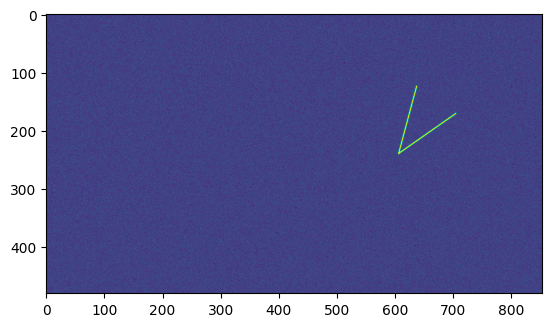

Our Prediction: 40.0 -- Correct_answer: 40 -- Errors: 0.0


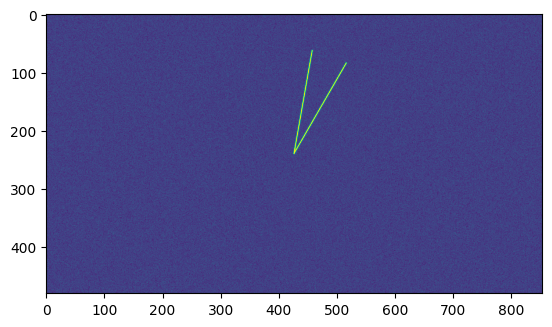

Our Prediction: 20.0 -- Correct_answer: 20 -- Errors: 0.0


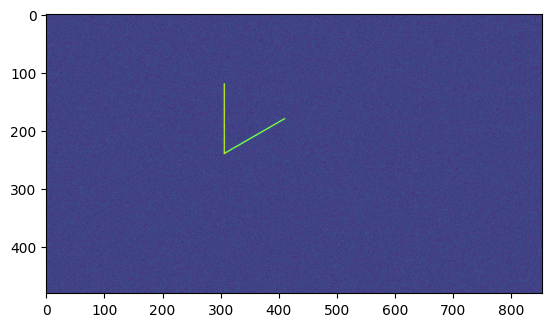

Our Prediction: 60.0 -- Correct_answer: 60 -- Errors: 0.0


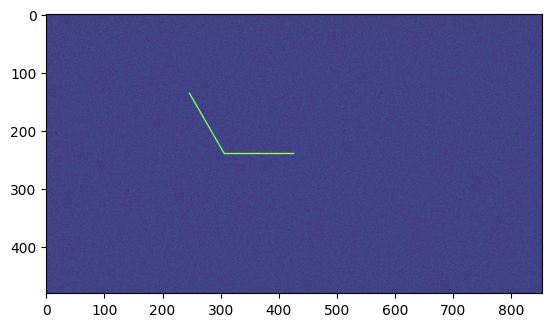

Our Prediction: 120.0 -- Correct_answer: 120 -- Errors: 0.0


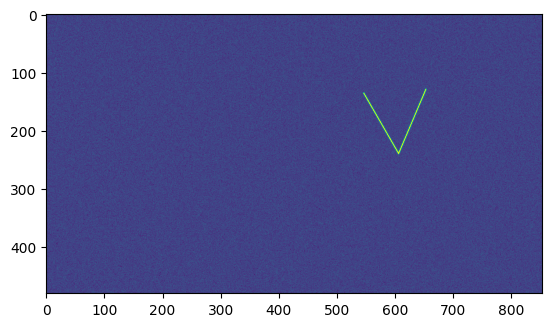

Our Prediction: 53.0 -- Correct_answer: 53 -- Errors: 0.0


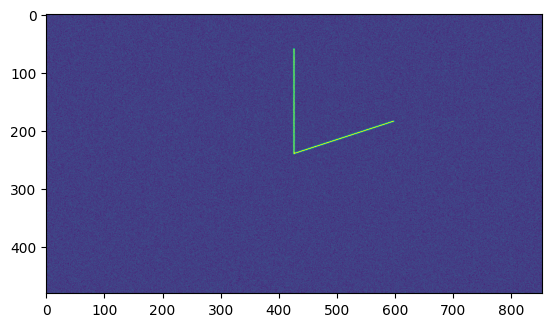

Our Prediction: 72.0 -- Correct_answer: 72 -- Errors: 0.0


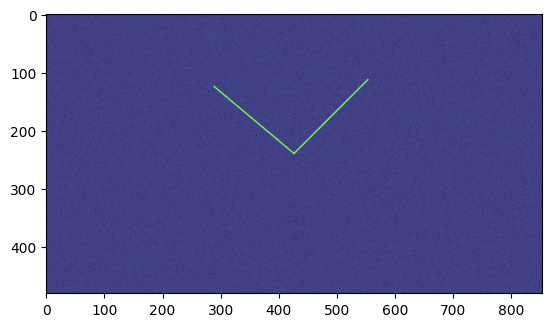

Our Prediction: 95.0 -- Correct_answer: 95 -- Errors: 0.0


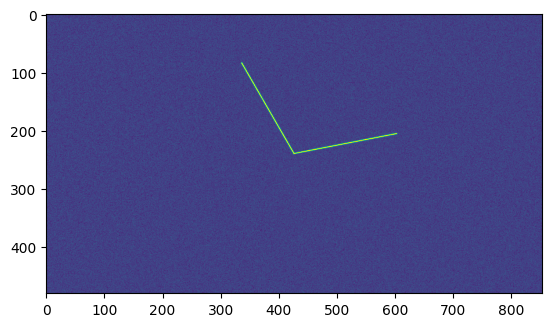

Our Prediction: 108.0 -- Correct_answer: 109 -- Errors: 1.0


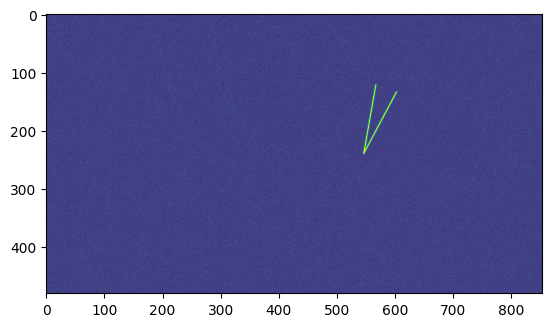

Our Prediction: 18.0 -- Correct_answer: 18 -- Errors: 0.0


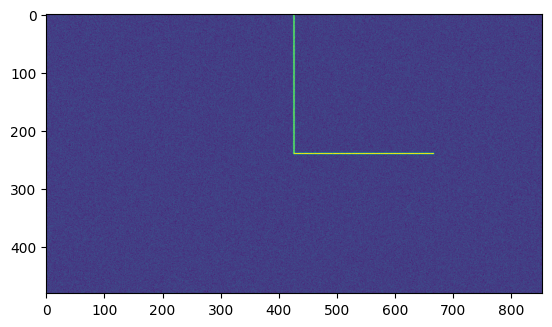

Our Prediction: 90.0 -- Correct_answer: 90 -- Errors: 0.0


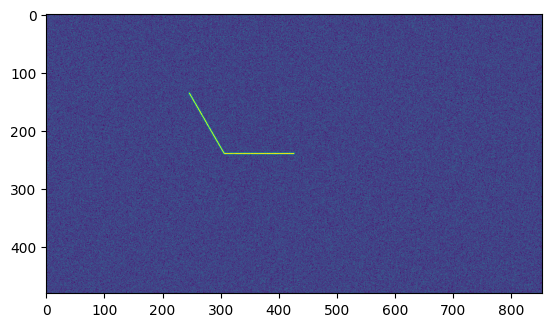

Our Prediction: 120.0 -- Correct_answer: 120 -- Errors: 0.0
Our Total Error: 1.0


In [4]:
dataset = pd.read_csv("Task1Dataset\\list.txt") # import data

our_total_error = 0 # error counter
hough_lines = 0 # inistaite hough_lines
thresh = 0 # hough threshold
counter = 0 # initiate conuter for dynamic param assignment
best_hough = None # keep track of best hough model, initiate to None

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)

    # Add Gaussian noise to the image
    noise_image = add_gaussian_noise(img, mean=0, sigma=10)
    plt.imshow(noise_image)
    plt.show()
    
    #Canny Step 
    edges = utils.canny(noise_image, gauss_kernel_size=5, sigma=35, low_threshold=50, high_threshold=150)

    #Hough Step
    hough_lines = utils.hough_lines(edges, threshold = 90, theta_res= 1.668, rho_res=1)
    best_hough = hough_lines
    
    # Dynamic hyperparameter aassignment
    while len(hough_lines) < 4 or len(hough_lines) > 6:
        if counter == 100: break 
        counter += 1
        if len(hough_lines) > 6: 
            thresh += 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines
        
        else:
            thresh -= 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines

    
    #print(len(hough_lines))
    counter = 0
    line_angles = []
    for rho, theta in best_hough:
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
        line_angles.append(theta)

    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")


    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    print(f"Our Prediction: {angle_between_lines} -- Correct_answer: {correct_answer} -- Errors: {np.abs(correct_answer-angle_between_lines)}")
    our_total_error += np.abs(correct_answer-angle_between_lines)


print(f"Our Total Error: {our_total_error}")


## Rotate Image

In [5]:
def get_rotated_image(image:np.ndarray, angle: int)-> np.ndarray:
    
    height, width = image.shape[:2]
    
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

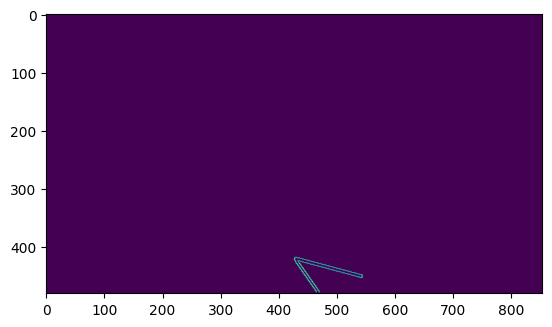

max line 145.0440000000002 | min line 105.01200000000006
angle1:  40.03200000000015 angle2:  319.96799999999985
Our Prediction: 40.0 -- Correct_answer: 40 -- Errors: 0.0




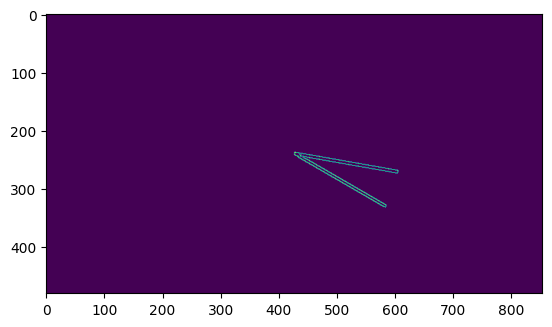

max line 120.0240000000001 | min line 100.00800000000002
angle1:  20.016000000000076 angle2:  339.9839999999999
Our Prediction: 20.0 -- Correct_answer: 20 -- Errors: 0.0




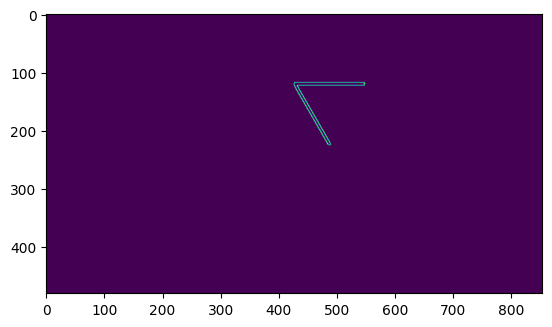

max line 150.0480000000002 | min line 90.0
angle1:  60.048000000000215 angle2:  299.95199999999977
Our Prediction: 60.0 -- Correct_answer: 60 -- Errors: 0.0




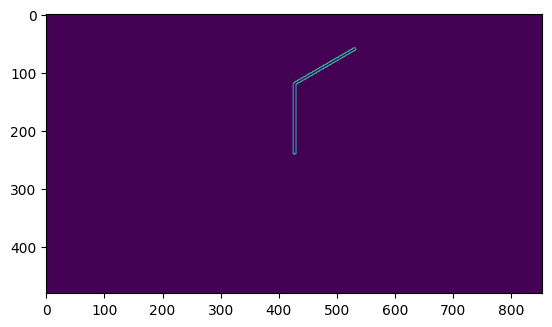

max line 60.12000000000057 | min line 0.07200000000034379
angle1:  60.04800000000023 angle2:  299.95199999999977
Our Prediction: 60.0 -- Correct_answer: 120 -- Errors: 60.0




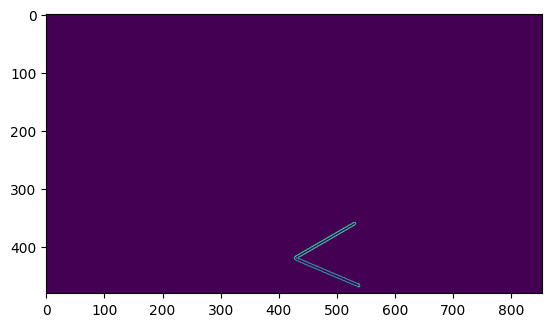

max line 113.35200000000007 | min line 60.12000000000057
angle1:  53.23199999999951 angle2:  306.7680000000005
Our Prediction: 53.0 -- Correct_answer: 53 -- Errors: 0.0




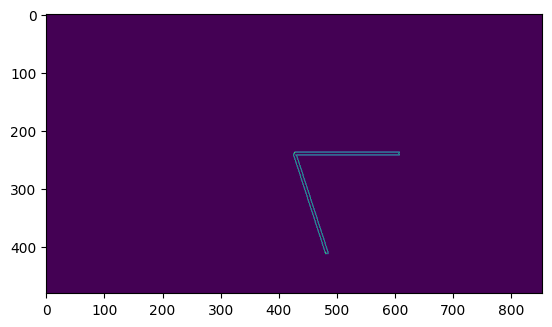

max line 161.72400000000027 | min line 90.0
angle1:  71.72400000000026 angle2:  288.2759999999997
Our Prediction: 72.0 -- Correct_answer: 72 -- Errors: 0.0




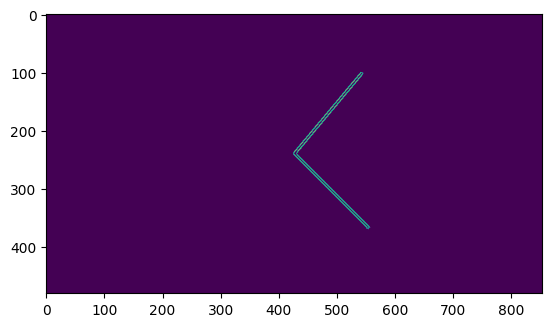

max line 135.03600000000017 | min line 40.1040000000005
angle1:  94.93199999999966 angle2:  265.0680000000003
Our Prediction: 95.0 -- Correct_answer: 95 -- Errors: 0.0




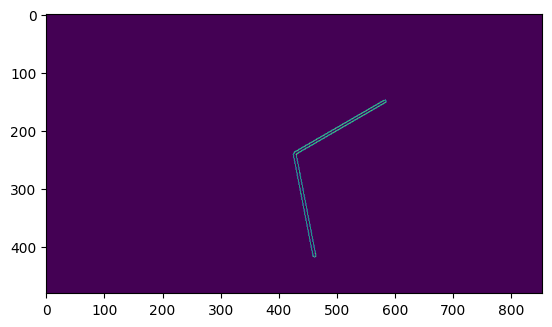

max line 168.3960000000003 | min line 60.12000000000057
angle1:  108.27599999999973 angle2:  251.72400000000027
Our Prediction: 108.0 -- Correct_answer: 109 -- Errors: 1.0




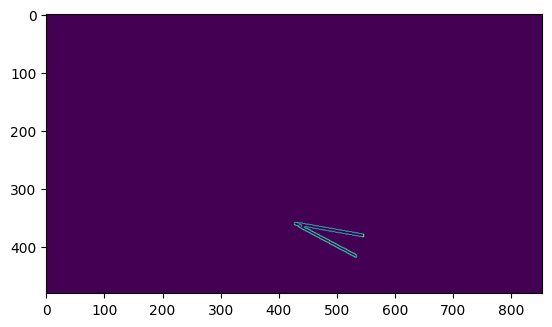

max line 118.35600000000011 | min line 100.00800000000002
angle1:  18.348000000000074 angle2:  341.65199999999993
Our Prediction: 18.0 -- Correct_answer: 18 -- Errors: 0.0




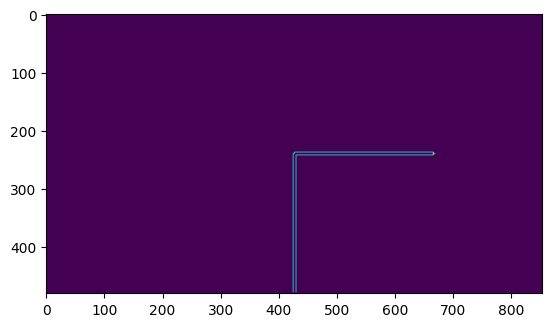

max line 90.0 | min line 0.07200000000034379
angle1:  89.92799999999966 angle2:  270.07200000000034
Our Prediction: 90.0 -- Correct_answer: 90 -- Errors: 0.0


Our Total Error: 61.0


In [91]:
dataset = pd.read_csv("Task1Dataset\\list.txt") # import data

our_total_error = 0 # error counter
hough_lines = 0 # inistaite hough_lines
thresh = 0 # hough threshold
counter = 0 # initiate conuter for dynamic param assignment
best_hough = None # keep track of best hough model, initiate to None

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)

    # Add Gaussian noise to the image
    noise_image = get_rotated_image(img, angle=-90)
    
    #Canny Step 
    edges = utils.canny(noise_image, gauss_kernel_size=5, sigma=20, low_threshold=70, high_threshold=110)
    plt.imshow(edges)
    plt.show()

    #Hough Step
    hough_lines = utils.hough_lines(edges, threshold = 90, theta_res= 1.668, rho_res=1)
    best_hough = hough_lines
    
    # Dynamic hyperparameter aassignment
    while len(hough_lines) < 4 or len(hough_lines) > 5:
        if counter == 100: break 
        counter += 1
        if len(hough_lines) > 5: 
            thresh += 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines
        
        else:
            thresh -= 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines

    
    #print(len(hough_lines))
    counter = 0
    line_angles = []
    for rho, theta in best_hough:
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
    
        theta = theta % (np.pi)
        line_angles.append(theta)

    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")


    # Calculate difference of angles and choose the smaller angle
    print(f"max line {np.rad2deg(max(line_angles))} | min line {np.rad2deg(min(line_angles))}")
    angle1 = abs(max(line_angles) - min(line_angles))
    angle2 = (2 * np.pi) - angle1
    print("angle1: " , np.rad2deg(angle1) , "angle2: ", np.rad2deg(angle2))
    
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    print(f"Our Prediction: {angle_between_lines} -- Correct_answer: {correct_answer} -- Errors: {np.abs(correct_answer-angle_between_lines)}")
    our_total_error += np.abs(correct_answer-angle_between_lines)
    print("\n")

print(f"Our Total Error: {our_total_error}")
